In [1]:
%reset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
%ls

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
20030101.nc/    20050101.nc.ok  Daily analysis_xz slices.ipynb
20030101.nc.ok  20060101.nc/    Region analysis.ipynb
20040101.nc/    20060101.nc.ok  Surface analysis.ipynb
20040101.nc.ok  20070101.nc/    tmp/
20050101.nc/    20070101.nc.ok


In [2]:
% cd /work/eay/OM4_rerun2/20070101.nc/
fs=xr.open_dataset('20070101.ocean_static_no_mask_table.nc')
lon=fs['geolon']; lat=fs['geolat']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
print(fs)


/work2/eay/OM4_rerun2/20070101.nc
<xarray.Dataset>
Dimensions:    (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh         (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh         (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time       (time) object 1900-01-01 00:00:00
  * xq         (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq         (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello  (yh, xh) float32 ...
    geolon     (yh, xh) float32 ...
    geolat     (yh, xh) float32 ...
    geolon_c   (yq, xq) float32 ...
    geolat_c   (yq, xq) float32 ...
    geolon_u   (yh, xq) float32 ...
    geolat_u   (yh, xq) float32 ...
    geolon_v   (yq, xh) float32 ...
    geolat_v   (yq, xh) float32 ...
    wet        (yh, xh) float32 ...
    wet_c      (yq, xq) float32 ...
    wet_u      (yh, xq) float32 ...
    wet_v      (yq, xh) float32 ...
    dxt        (yh, xh) flo

In [3]:
title='2007-03-17' #J16 F15 M17 A16 M16 J15 Jy15 A14 S18 O18 N17 D17
data1=xr.open_dataset('20070101.ocean_5daily.nc').sel(time=title)
data1=xr.merge([fs.geolon, fs.geolat, data1])
data1=xr.merge([fs.geolon_u,fs.geolat_u,fs.geolon_v,fs.geolat_v,data1])
print(data1)
salt=data1['so'].isel(zl=0)
temp=data1['thetao'].isel(zl=0)
MLD=data1['MLD_003']
depth=data1['depth_ocean']
massin=data1['net_massin']
massout=data1['net_massout']
#u=nc.Dataset('20030101.ocean_5daily.nc')['uh'][0,0,:,:]
#v=nc.Dataset('20030101.ocean_5daily.nc')['vh'][0,0,:,:]
#u[u>=1e18]=np.nan; v[v>=1e18]=np.nan;
#umag=(u**2+v**2)**0.5 #use nc.Dataset for u,v because xarray causes memory error here
heatflux=data1['net_heat_coupler']
downsaltflux=data1['sfdsi']
data2=xr.open_dataset('20070101.ice_5daily.nc').sel(time=title)
ice=data2['siconc']

print(data1)

<xarray.Dataset>
Dimensions:           (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080, zi: 76, zl: 75)
Coordinates:
  * yh                (yh) float64 -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * xq                (xq) float64 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * xh                (xh) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yq                (yq) float64 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
  * time              (time) object 2007-03-17 00:00:00
  * zl                (zl) float64 1.0 3.0 5.0 ... 3.338e+03 3.591e+03 5.111e+03
  * zi                (zi) float64 0.0 2.0 4.0 ... 3.461e+03 3.722e+03 6.5e+03
Data variables:
    geolon_u          (yh, xq) float32 ...
    geolat_u          (yh, xq) float32 ...
    geolon_v          (yq, xh) float32 ...
    geolat_v          (yq, xh) float32 ...
    geolon            (yh, xh) float32 ...
    geolat            (yh, xh) float32 ...
    zos               (time, yh, xh) float32 ...
    thetao            (time, zl,

In [4]:
np.min(lon)

<xarray.DataArray 'geolon' ()>
array(-299.999481)

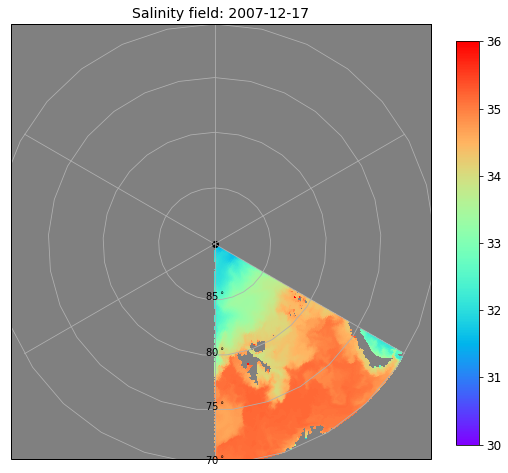

In [6]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

clon=lon.where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)
clat=lat.where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)
cdata=salt[0,:,:].where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolor(clon,clat,cdata,transform=ccrs.PlateCarree(),vmax=36, vmin=30,cmap='rainbow');
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Salinity field: '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

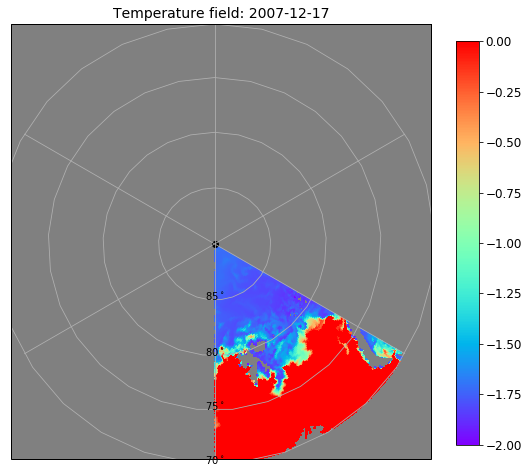

In [7]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

clon=lon.where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)
clat=lat.where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)
cdata=temp[0,:,:].where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolor(clon,clat,cdata,transform=ccrs.PlateCarree(),vmax=0, vmin=-2,cmap='rainbow');
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Temperature field: '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

In [5]:
def wright_eos(T,S,p):
  """                                                                                                                                                                                                              
                                                                                                                                                                                                                   
 **********************************************************************                                                                                                                                            
   The subroutines in this file implement the equation of state for   *                                                                                                                                            
   sea water using the formulae given by  Wright, 1997, J. Atmos.     *                                                                                                                                            
   Ocean. Tech., 14, 735-740.  Coded by R. Hallberg, 7/00.            *                                                                                                                                            
 ***********************************************************************                                                                                                                                           
    Converted to Python from F90 by M Harrison 10/11.                                                                                                                                                              
                                                                                                                                                                                                                   
 Calculate seawater equation of state, given T[degC],S[PSU],p[Pa]                                                                                                                                                  
 Returns density [kg m-3]                                                                                                                                                                                          
                                                                                                                                                                                                                   
 ***********************************************************************                                                                                                                                           
                                                                                                                                                                                                                   
 """

  a0 = 7.057924e-4; a1 = 3.480336e-7; a2 = -1.112733e-7;
  b0 = 5.790749e8;  b1 = 3.516535e6;  b2 = -4.002714e4;
  b3 = 2.084372e2;  b4 = 5.944068e5;  b5 = -9.643486e3;
  c0 = 1.704853e5;  c1 = 7.904722e2;  c2 = -7.984422;
  c3 = 5.140652e-2; c4 = -2.302158e2; c5 = -3.079464;

  al0 = a0 + a1*T +a2*S
  p0  = b0 + b4*S + T * (b1 + T*(b2 + b3*T) + b5*S)
  lam = c0 +c4*S + T * (c1 + T*(c2 + c3*T) + c5*S)
  I_denom = 1.0 / (lam + al0*(p+p0))
  rho = (p + p0) * I_denom

  return rho

In [9]:

density=wright_eos(temp,salt,0.0)

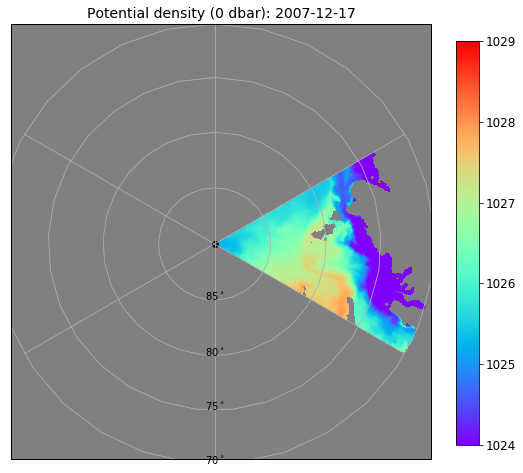

In [10]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

clon=lon.where(data1.geolat>70).where(data1.geolon>-300).where(data1.geolon<-240)
clat=lat.where(data1.geolat>70).where(data1.geolon>-300).where(data1.geolon<-240)
cdata=density[0,:,:].where(data1.geolat>70).where(data1.geolon>-300).where(data1.geolon<-240)

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolor(clon,clat,cdata,transform=ccrs.PlateCarree(),vmin=1024,vmax=1029,cmap='rainbow');
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Potential density (0 dbar): '+title,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

In [6]:
e=data1['e'].where(data1.geolat>70)#.where(data1.geolon>-60).where(data1.geolon<0)
thickness=np.diff(-e,axis=1)
dx=np.tile(fs['dxt'],[1,75,1,1])
dy=np.tile(fs['dyt'],[1,75,1,1])
tempfull=data1['thetao'].where(data1.geolat>70)#.where(data1.geolon>-60).where(data1.geolon<0)
saltfull=data1['so'].where(data1.geolat>70)#.where(data1.geolon>-60).where(data1.geolon<0)

densityfull=wright_eos(tempfull,saltfull,0.0)
volumefull=(dx*dy*thickness)

#densityfull=densityfull.where(data1.depth_ocean<200)
#density1=densityfull.where(data1.geolon>0).where(data1.geolon<60)
#density2=densityfull.where(data1.geolon>-300).where(data1.geolon<-240)
#density3=densityfull.where(data1.geolon>-240).where(data1.geolon<-180)
#density4=densityfull.where(data1.geolon>-180).where(data1.geolon<-120)
#density5=densityfull.where(data1.geolon>-120).where(data1.geolon<-60)
#density6=densityfull.where(data1.geolon>-60).where(data1.geolon<0)
print('done')

done


In [7]:
np.shape(densityfull)

(1, 75, 1080, 1440)

In [12]:
bins=np.zeros(22); bins[0]=1026; bins[-1]=1028.5; bins[1:-1]=np.linspace(1026,1028.5,20); 
histdata1=0*bins; histdata2=0*bins; histdata3=0*bins; histdata4=0*bins; histdata5=0*bins; histdata6=0*bins;
print(bins)
for i in range(len(bins)):
    if i==0:
        histdata1[i]=np.sum(volumefull[np.where(density1<bins[i])])
        histdata2[i]=np.sum(volumefull[np.where(density2<bins[i])])
        histdata3[i]=np.sum(volumefull[np.where(density3<bins[i])])
        histdata4[i]=np.sum(volumefull[np.where(density4<bins[i])])
        histdata5[i]=np.sum(volumefull[np.where(density5<bins[i])])
        histdata6[i]=np.sum(volumefull[np.where(density6<bins[i])])
        print(i)
    elif i==len(bins)-1:
        histdata1[i]=np.sum(volumefull[np.where(density1>=bins[i])])
        histdata2[i]=np.sum(volumefull[np.where(density2>=bins[i])])
        histdata3[i]=np.sum(volumefull[np.where(density3>=bins[i])])
        histdata4[i]=np.sum(volumefull[np.where(density4>=bins[i])])
        histdata5[i]=np.sum(volumefull[np.where(density5>=bins[i])])
        histdata6[i]=np.sum(volumefull[np.where(density6>=bins[i])])
        print(i)
    else:
        histdata1[i]=np.sum(volumefull[np.where((density1 >= bins[i]) & (density1 < bins[i+1]))])
        histdata2[i]=np.sum(volumefull[np.where((density2 >= bins[i]) & (density2 < bins[i+1]))])
        histdata3[i]=np.sum(volumefull[np.where((density3 >= bins[i]) & (density3 < bins[i+1]))])
        histdata4[i]=np.sum(volumefull[np.where((density4 >= bins[i]) & (density4 < bins[i+1]))])
        histdata5[i]=np.sum(volumefull[np.where((density5 >= bins[i]) & (density5 < bins[i+1]))])
        histdata6[i]=np.sum(volumefull[np.where((density6 >= bins[i]) & (density6 < bins[i+1]))])

        print(i)
    
    

[1026.         1026.         1026.13157895 1026.26315789 1026.39473684
 1026.52631579 1026.65789474 1026.78947368 1026.92105263 1027.05263158
 1027.18421053 1027.31578947 1027.44736842 1027.57894737 1027.71052632
 1027.84210526 1027.97368421 1028.10526316 1028.23684211 1028.36842105
 1028.5        1028.5       ]
0
1
2


KeyboardInterrupt: 

1.0

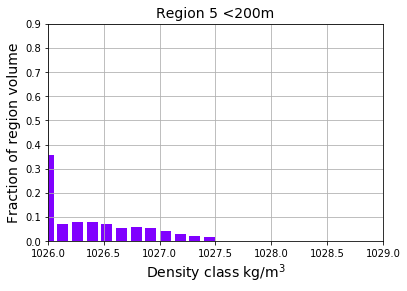

In [120]:
fig = plt.figure()#(figsize=(6, 4))
plt.bar(bins,histdata5/np.nansum(histdata5),width=.1,color=[.5, 0, 1])
plt.grid()
plt.xlabel('Density class kg/m$^3$',fontsize=14)
plt.xlim([1026,1029])
plt.ylim([0, 0.9])
plt.ylabel('Fraction of region volume',fontsize=14)
plt.title('Region 5 <200m',fontsize=14)
sum(histdata1/np.sum(histdata1))

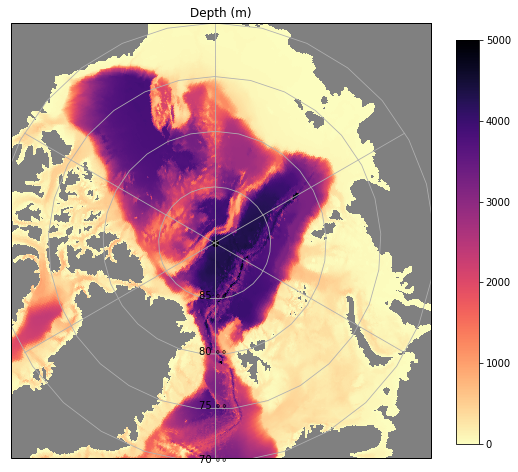

In [51]:
fig = plt.figure(figsize=(8, 8)) 
ax1 = fig.add_axes([.92, 0.15, 0.04, .7]) 
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree()) 
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2); 
plt.pcolormesh(lon, lat,depth,transform=ccrs.PlateCarree(),vmin=0,vmax=5000,cmap='magma_r'); 
plt.colorbar(cax=ax1) 
gl=ax.gridlines(crs=ccrs.PlateCarree()) 
plt.title('Depth (m)') 
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree()) 
pointx=[0,0,0,0]; pointy=[70,75,80,85]; 
text=['70 ∘∘ ','75 ∘∘ ','80 ∘∘ ','85 ∘∘ '] 
for i in range(len(pointx)): 
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

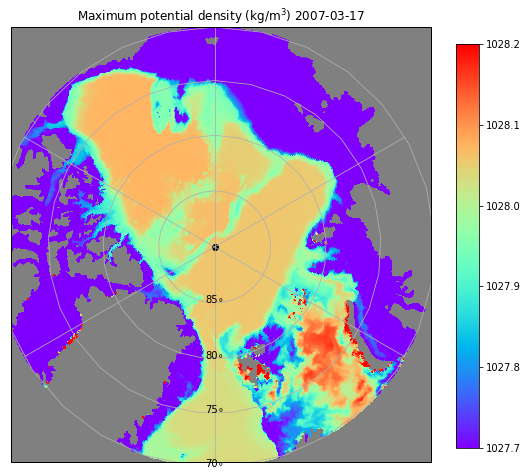

In [8]:
maxdensity=np.max(densityfull,axis=1)
fig = plt.figure(figsize=(8, 8)) 
ax1 = fig.add_axes([.92, 0.15, 0.04, .7]) 
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree()) 
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2); 
plt.pcolormesh(lon, lat,maxdensity[0,:,:],transform=ccrs.PlateCarree(),vmin=1027.7,vmax=1028.2,cmap='rainbow'); 
plt.colorbar(cax=ax1) 
gl=ax.gridlines(crs=ccrs.PlateCarree()) 
plt.title('Maximum potential density (kg/m$^3$) '+title) 
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree()) 
pointx=[0,0,0,0]; pointy=[70,75,80,85]; 
text=['70∘','75∘','80∘','85∘'] 
for i in range(len(pointx)): 
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

NameError: name 'march' is not defined

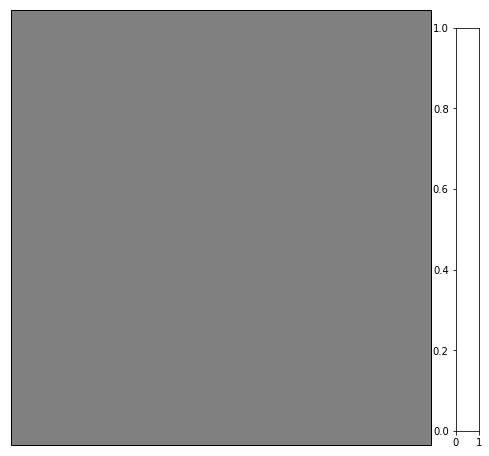

In [35]:
maxdensity=np.max(densityfull,axis=1)
fig = plt.figure(figsize=(8, 8)) 
ax1 = fig.add_axes([.92, 0.15, 0.04, .7]) 
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree()) 
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2); 
plt.pcolormesh(lon, lat,march[0,:,:]-september[0,:,:],transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-1,vmax=1)#,vmin=1027.7,vmax=1028.2); 
plt.colorbar(cax=ax1) 
gl=ax.gridlines(crs=ccrs.PlateCarree()) 
plt.title('Maximum potential density difference (kg/m$^3$) '+title) 
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree()) 
pointx=[0,0,0,0]; pointy=[70,75,80,85]; 
text=['70∘','75∘','80∘','85∘'] 
for i in range(len(pointx)): 
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

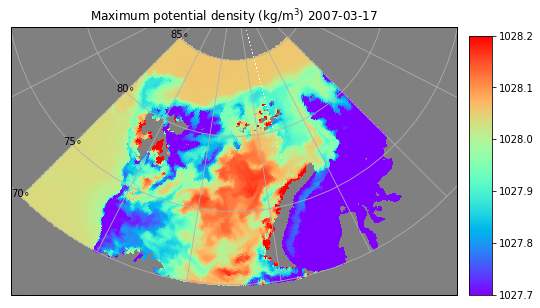

In [36]:
maxdensity1=maxdensity.where(data1.geolon>0).where(data1.geolon<60)\
    .where(data1.geolat>70).where(data1.geolat<85)
maxdensity2=maxdensity.where(data1.geolon>-300).where(data1.geolon<-270)\
    .where(data1.geolat>70).where(data1.geolat<85)
fig = plt.figure(figsize=(8, 8)) 
ax1 = fig.add_axes([.92, 0.27, 0.04, .45]) 
ax = plt.axes(projection=ccrs.Orthographic(45,90))

ax.set_extent([0, 90, 69, 86],ccrs.PlateCarree()) 
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2); 
plt.pcolormesh(lon, lat,maxdensity1[0,:,:],transform=ccrs.PlateCarree(),vmin=1027.7,vmax=1028.2,cmap='rainbow'); 
plt.pcolormesh(lon, lat,maxdensity2[0,:,:],transform=ccrs.PlateCarree(),vmin=1027.7,vmax=1028.2,cmap='rainbow'); 

plt.colorbar(cax=ax1) 
gl=ax.gridlines(crs=ccrs.PlateCarree()) 
plt.title('Maximum potential density (kg/m$^3$) '+title) 
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree()) 
pointx=[0,0,0,0]; pointy=[70,75,80,85]; 
text=['70∘','75∘','80∘','85∘'] 
for i in range(len(pointx)): 
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

Text(0.5,1,'Maximum potential density (kg/m$^3$) 2007-12-17')

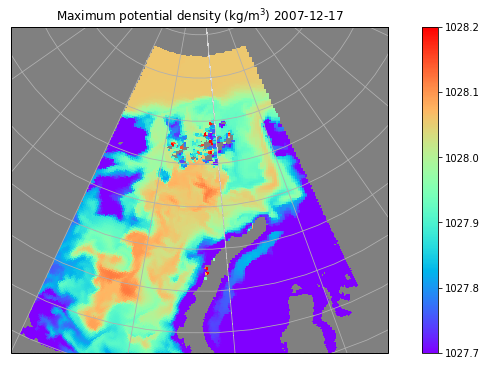

In [49]:
maxdensity=np.max(densityfull,axis=1)
maxdensity1=maxdensity.where(data1.geolon>30).where(data1.geolon<60)\
    .where(data1.geolat>70).where(data1.geolat<85)
maxdensity2=maxdensity.where(data1.geolon>-300).where(data1.geolon<-280)\
    .where(data1.geolat>70).where(data1.geolat<85)
fig = plt.figure(figsize=(12, 6)) 

ax = plt.axes(projection=ccrs.Orthographic(55,90))

ax.set_extent([30, 80, 69, 86],ccrs.PlateCarree()) 
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2); 
plt.pcolormesh(lon, lat,maxdensity1[0,:,:],transform=ccrs.PlateCarree(),cmap='rainbow',vmin=1027.7,vmax=1028.2); 
plt.pcolormesh(lon, lat,maxdensity2[0,:,:],transform=ccrs.PlateCarree(),cmap='rainbow',vmin=1027.7,vmax=1028.2); 

plt.colorbar() 
gl=ax.gridlines(crs=ccrs.PlateCarree()) 
plt.title('Maximum potential density (kg/m$^3$) '+title) 
#march1=maxdensity1; march2=maxdensity2
    

Text(0.5,1,'Zonal thickness flux uh (m$^3$/s)2007-03-17')

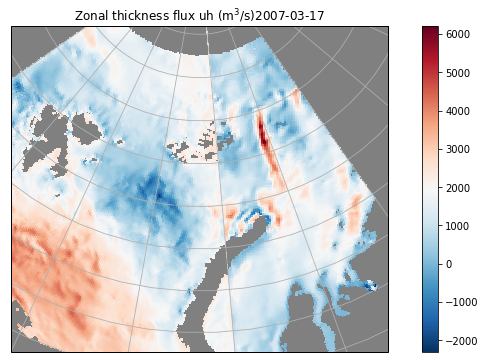

In [30]:
u=data1['uh'].isel(zl=0); #u=u[0,:,:]
u1=u.where(data1.geolon_u>0).where(data1.geolon_u<60)\
    .where(data1.geolat_u>70).where(data1.geolat_u<85)
u2=u.where(data1.geolon_u>-300).where(data1.geolon_u<-270)\
    .where(data1.geolat_u>70).where(data1.geolat_u<85)

fig = plt.figure(figsize=(12, 6)) 
ax = plt.axes(projection=ccrs.Orthographic(55,90))

ax.set_extent([30, 80, 69, 86],ccrs.PlateCarree()) 
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2); 
plt.pcolormesh(lon, lat,u1[0,:,:],transform=ccrs.PlateCarree(),cmap='RdBu_r'); 
plt.pcolormesh(lon, lat,u2[0,:,:],transform=ccrs.PlateCarree(),cmap='RdBu_r'); 

plt.colorbar() 
gl=ax.gridlines(crs=ccrs.PlateCarree()) 
plt.title('Zonal thickness flux uh (m$^3$/s)'+title) 


In [28]:
u=data1['uh'].isel(zl=0); #u=u[0,:,:]
u1=u.where(data1.geolon_u>0).where(data1.geolon_u<60)\
    .where(data1.geolat_u>70).where(data1.geolat_u<85)

In [29]:
u1.shape

(1, 1080, 1440)

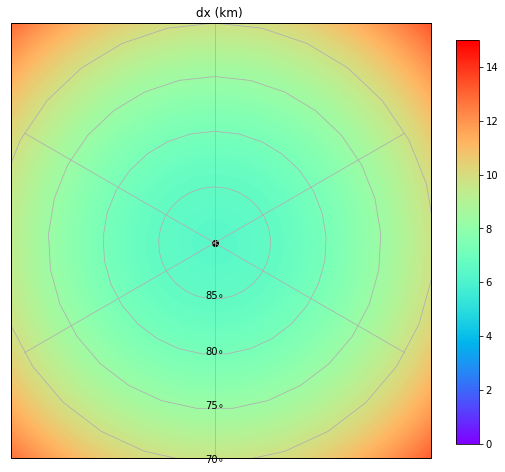

In [89]:

fig = plt.figure(figsize=(8, 8)) 
ax1 = fig.add_axes([.92, 0.15, 0.04, .7]) 
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree()) 
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2); 
plt.pcolormesh(lon, lat,dx[0,0,:,:]/1000.,transform=ccrs.PlateCarree(),cmap='rainbow',vmin=0,vmax=15); 
plt.colorbar(cax=ax1) 
gl=ax.gridlines(crs=ccrs.PlateCarree()) 
plt.title('dx (km) ') 
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree()) 
pointx=[0,0,0,0]; pointy=[70,75,80,85]; 
text=['70∘','75∘','80∘','85∘'] 
for i in range(len(pointx)): 
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

In [ ]:
print(done)